# Exercise 5: Curve Fitting Methods

[]

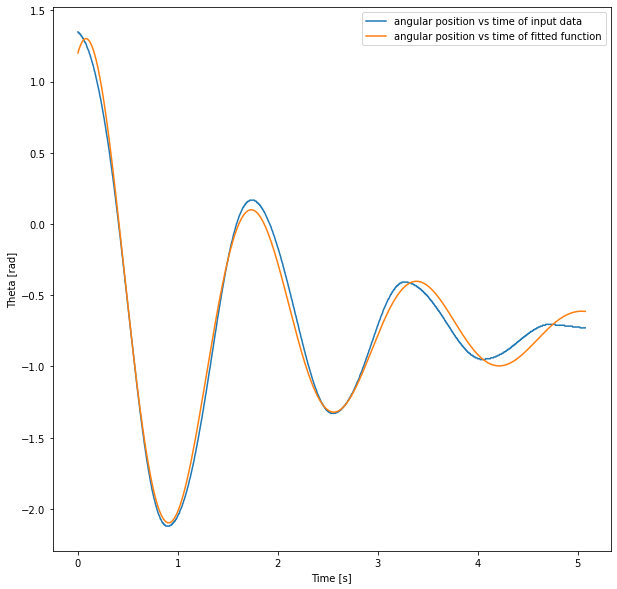

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos
from scipy.optimize import minimize

# CONSTANTS ========================================================================

file = "damped_oscillation.txt" #input file

guesses = [1, 0.5, 0.3, 0.2, 1] # guesses for initialization of model fit, meaningless

# FUNCTIONS ========================================================================

def damped_oscillator(theta_0, beta, omega, upper_phi, lower_phi, t):
    '''Oscillator model as a mathematical function, returns angular position at time
    Keyword Arguments:
        theta_0    -- initial angular position
        beta       -- decay constant
        omega      -- natural frequency
        upper_phi  -- phase constant
        lower_phi  -- a second, cooler phase constant
        t          -- time
    returns:
        float/np.array -- amplitude of signal at given time
    '''
    return theta_0*exp(-beta*t)*cos(omega*t+upper_phi)+lower_phi
def oscillator_model_fitter(x0, *args):
    ''' Takes in a set of arguments for the oscillator along with the live data and finds the difference between the calculated values from our mathematical model and our live data
    Keyword Arguments:
        x0 -- initial values of damped oscillator
        *args -- test data
    returns:
        float -- chi^2, how well x0 values fit data
    '''
    theta_0   = x0[0] #unpack all our variables
    beta      = x0[1]
    omega     = x0[2]
    upper_phi = x0[3]
    lower_phi = x0[4]

    chi2 = 0 #no chi2 failure yet

    x = args[0]
    y = args[1] #live data
    
    length = y.size #because numpy arrays

    for i in range(length):
        observed = damped_oscillator(theta_0, beta, omega, upper_phi, lower_phi, x[i]) # What we determine
        expected = y[i] #what we wanted
        chi2 += (observed-expected)**2 #result
    return chi2/length #return fit

# MAGIC     ========================================================================

# FILE GET
angular_position = np.array([])
time = np.array([])
with open(file, 'r') as f: #with closes the file for us
    # ^ Pythonic
    for line in f:
        cols = line.split() #separate on spaces
        time = np.append(time, float(cols[0])) #two lists, both floats
        angular_position = np.append(angular_position, float(cols[1]))

data = time, angular_position #packing for use in minimize

minimized = minimize(oscillator_model_fitter, 
                        guesses, 
                        args=data, 
                        method='Nelder-Mead',
                        tol=1e-10) #minimization!

min_theta0    = minimized['x'][0] #unpack minimized values, for readability
min_beta      = minimized['x'][1]
min_omega     = minimized['x'][2]
min_upper_phi = minimized['x'][3]
min_lower_phi = minimized['x'][4]

minimized_y_data = damped_oscillator(min_theta0, 
                                        min_beta,
                                        min_omega,
                                        min_upper_phi,
                                        min_lower_phi,
                                        time) #putting found values into function
# PLOTS     ========================================================================
fig, ax = plt.subplots(figsize=(10, 10)) 
#^ at this point I just write this because it's familiar, not because it's the best
ax.plot(time, angular_position, label='angular position vs time of input data')
ax.plot(time, minimized_y_data, label='angular position vs time of fitted function')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Theta [rad]')
ax.legend()
ax.plot()

# Results
The curve fitting method chosen was the minimize function in scipy.optimize. It provided an easier analysis and setup versus curve_fit for exponential functions like the one we were plotting above, despite additional code requirements in the chi^2 function.

As we can see, the curve has been fit to the original data is a fairly good way. While not perfect in its deviation from the real values, seen clearly in the graph above, we still have a very good fit overall to the data we have.
We found the final fit values of 

theta_0   = 2.17426332 rads,

beta      = 0.52761494 1/s, 

omega     = 3.8010946 rads/s, 

upper_phi = -0.44355512 rads, 

lower_phi = -0.76333783 rads
